<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

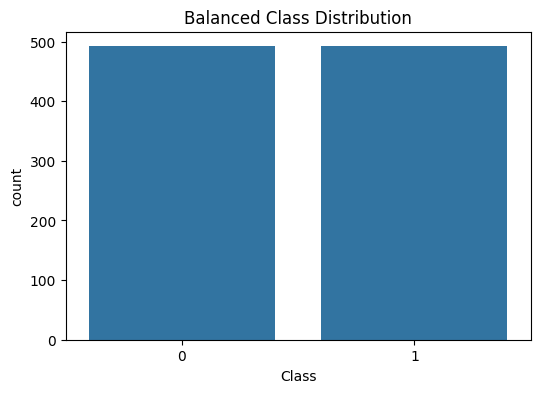

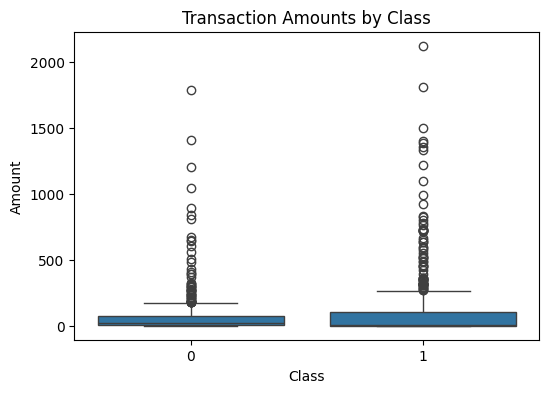

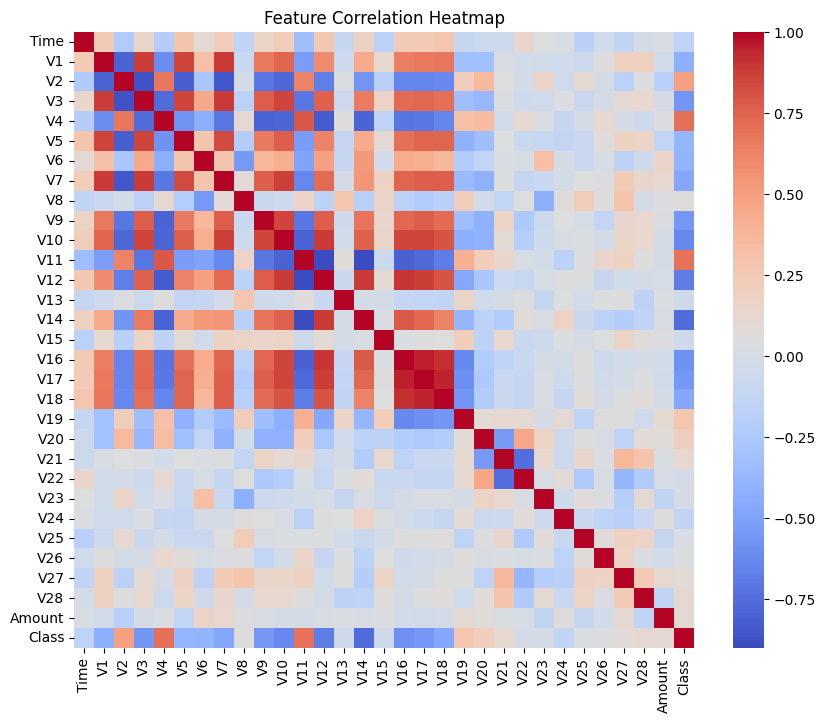

Logistic Regression - Training Accuracy: 0.9390088945362135
Logistic Regression - Test Accuracy: 0.9695431472081218


C:\Users\Shehzadian-2\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


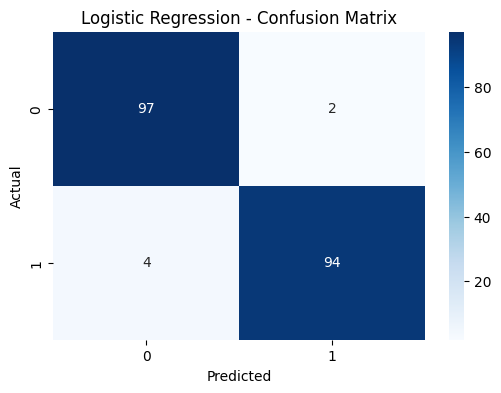

Logistic Regression - Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.98      0.97        99
           1       0.98      0.96      0.97        98

    accuracy                           0.97       197
   macro avg       0.97      0.97      0.97       197
weighted avg       0.97      0.97      0.97       197



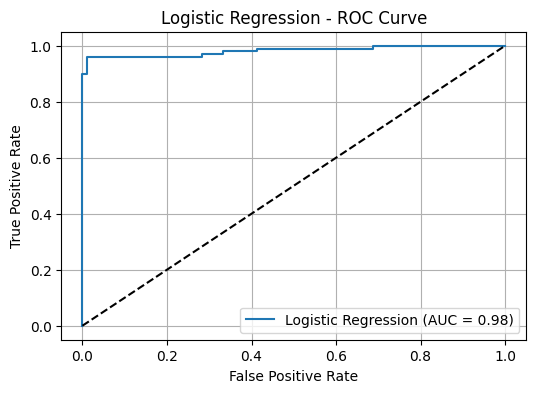

Random Forest - Training Accuracy: 1.0
Random Forest - Test Accuracy: 0.9644670050761421


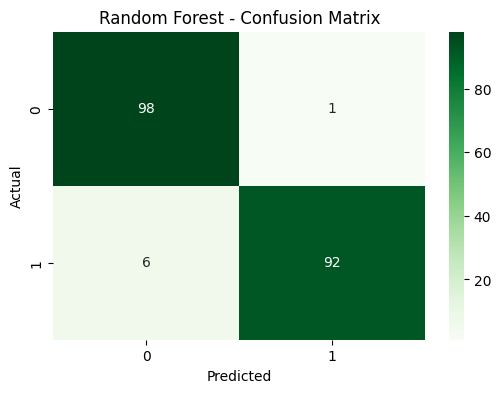

Random Forest - Classification Report:
               precision    recall  f1-score   support

           0       0.94      0.99      0.97        99
           1       0.99      0.94      0.96        98

    accuracy                           0.96       197
   macro avg       0.97      0.96      0.96       197
weighted avg       0.97      0.96      0.96       197



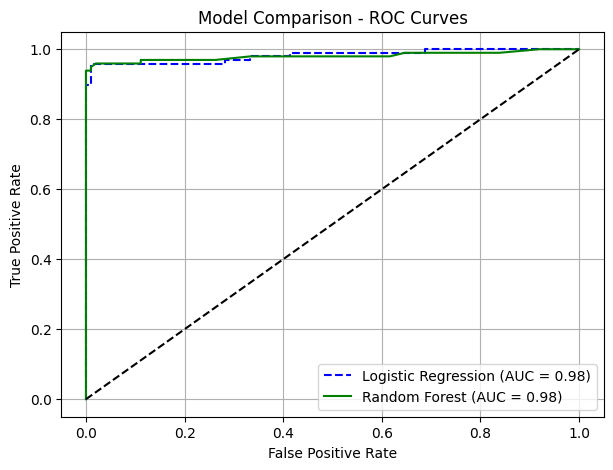

In [1]:
# Import Libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_curve, auc

# Load Dataset
credit_card_data = pd.read_csv('creditcard.csv')
print(credit_card_data.info())
print(credit_card_data.isnull().sum())

# Balance Dataset: Sample equal fraud and legit transactions
legit = credit_card_data[credit_card_data.Class == 0]
fraud = credit_card_data[credit_card_data.Class == 1]
legit_sample = legit.sample(n=492, random_state=2)
new_dataset = pd.concat([legit_sample, fraud], axis=0)
new_dataset = new_dataset.sample(frac=1, random_state=2)  # Shuffle

# Visualizations
plt.figure(figsize=(6, 4))
sns.countplot(x='Class', data=new_dataset)
plt.title('Balanced Class Distribution')
plt.show()

plt.figure(figsize=(6, 4))
sns.boxplot(x='Class', y='Amount', data=new_dataset)
plt.title('Transaction Amounts by Class')
plt.show()

plt.figure(figsize=(10, 8))
sns.heatmap(new_dataset.corr(), cmap='coolwarm', annot=False)
plt.title('Feature Correlation Heatmap')
plt.show()

# Prepare Features and Labels
X = new_dataset.drop(columns='Class', axis=1)
Y = new_dataset['Class']

# Feature Scaling
scaler = StandardScaler()
X['Amount'] = scaler.fit_transform(X[['Amount']])

# Train-Test Split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, stratify=Y, random_state=2)

# ================= Logistic Regression =================
lr_model = LogisticRegression()
lr_model.fit(X_train, Y_train)
lr_train_pred = lr_model.predict(X_train)
lr_test_pred = lr_model.predict(X_test)

print("Logistic Regression - Training Accuracy:", accuracy_score(Y_train, lr_train_pred))
print("Logistic Regression - Test Accuracy:", accuracy_score(Y_test, lr_test_pred))

# Confusion Matrix
lr_cm = confusion_matrix(Y_test, lr_test_pred)
plt.figure(figsize=(6, 4))
sns.heatmap(lr_cm, annot=True, fmt='d', cmap='Blues')
plt.title('Logistic Regression - Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Classification Report
print("Logistic Regression - Classification Report:\n", classification_report(Y_test, lr_test_pred))

# ROC Curve
lr_fpr, lr_tpr, _ = roc_curve(Y_test, lr_model.predict_proba(X_test)[:, 1])
lr_auc = auc(lr_fpr, lr_tpr)
plt.figure(figsize=(6, 4))
plt.plot(lr_fpr, lr_tpr, label='Logistic Regression (AUC = {:.2f})'.format(lr_auc))
plt.plot([0, 1], [0, 1], 'k--')
plt.title('Logistic Regression - ROC Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.grid(True)
plt.show()

# ================= Random Forest =================
rf_model = RandomForestClassifier(n_estimators=100, random_state=2)
rf_model.fit(X_train, Y_train)
rf_train_pred = rf_model.predict(X_train)
rf_test_pred = rf_model.predict(X_test)

print("Random Forest - Training Accuracy:", accuracy_score(Y_train, rf_train_pred))
print("Random Forest - Test Accuracy:", accuracy_score(Y_test, rf_test_pred))

# Confusion Matrix
rf_cm = confusion_matrix(Y_test, rf_test_pred)
plt.figure(figsize=(6, 4))
sns.heatmap(rf_cm, annot=True, fmt='d', cmap='Greens')
plt.title('Random Forest - Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Classification Report
print("Random Forest - Classification Report:\n", classification_report(Y_test, rf_test_pred))

# ROC Curve
rf_fpr, rf_tpr, _ = roc_curve(Y_test, rf_model.predict_proba(X_test)[:, 1])
rf_auc = auc(rf_fpr, rf_tpr)

# Compare ROC Curves
plt.figure(figsize=(7, 5))
plt.plot(lr_fpr, lr_tpr, label='Logistic Regression (AUC = {:.2f})'.format(lr_auc), linestyle='--', color='blue')
plt.plot(rf_fpr, rf_tpr, label='Random Forest (AUC = {:.2f})'.format(rf_auc), color='green')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Model Comparison - ROC Curves')
plt.legend()
plt.grid(True)
plt.show()
